# Preprocess the data

In [2]:
import pandas as pd

combined_data = pd.read_csv('Coswara-Data/combined_data.csv')
combined_data.head()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep only the columns that are needed for the analysis.

In [3]:
combined_data = combined_data[['id', 'a', 'g', 'covid_status', 'asthma', 'cough', 'smoker', 'test_status']]
combined_data

,id,a,g,covid_status,asthma,cough,smoker,test_status
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,male,healthy,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,male,healthy,NaN,NaN,True,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,female,healthy,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,male,healthy,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,male,healthy,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2741,333NjqA1TfZJuICEdXSkPhVz0LA3,48,male,positive_asymp,NaN,NaN,n,p
2742,dpA0EeRrtJUeKJjEuf7BL0AeTJZ2,36,male,positive_mild,NaN,True,y,p
2743,UXhG3vgoxkWtd4Meky1nm0sRgMV2,76,male,positive_mild,NaN,NaN,n,p
2744,A5KW9PXraNgckln1gnNaJnX6DvB2,25,male,positive_moderate,NaN,True,n,p


In [4]:
combined_data['covid_status'].value_counts()

healthy                        1433
positive_mild                   426
no_resp_illness_exposed         248
positive_moderate               165
resp_illness_not_identified     157
recovered_full                  146
positive_asymp                   90
under_validation                 81
Name: covid_status, dtype: int64

In [5]:
combined_data['test_status'].value_counts()

p     681
na    314
n     257
ut     81
Name: test_status, dtype: int64

The 'ut' label for the `test_status` column seems to be used to indicate that the test was not validated yet, matching with the 'under_validation' label in the `covid_status` column.

In [6]:
combined_data[combined_data['test_status'] == 'ut']['covid_status'].value_counts()

under_validation    81
Name: covid_status, dtype: int64

Let's remove the rows with this label.

In [7]:
combined_data = combined_data[combined_data['test_status'] != 'ut']
combined_data['test_status'].value_counts()

p     681
na    314
n     257
Name: test_status, dtype: int64

In [68]:
combined_data[combined_data['test_status'] == 'na']['covid_status'].value_counts()

KeyError: 'test_status'

We can observe that the 'na' label for the `test_status` column, used to indicate that the test was not performed, matches in most cases with the 'healthy' label in the `covid_status` column.  
Let's used this label as a 'n' label for the `test_status` column.

In [9]:
combined_data.loc[combined_data['test_status'] == 'na', 'test_status'] = 'n'
combined_data['test_status'].value_counts()

p    681
n    571
Name: test_status, dtype: int64

Now let's update the labels for the `covid_status` column to only have two labels: 'positive' and 'healthy'.

In [10]:
combined_data['covid_status'].value_counts()

healthy                        1433
positive_mild                   426
no_resp_illness_exposed         248
positive_moderate               165
resp_illness_not_identified     157
recovered_full                  146
positive_asymp                   90
Name: covid_status, dtype: int64

In [11]:
combined_data.loc[combined_data['test_status'] == 'n', 'covid_status'] = 'healthy'
combined_data.loc[combined_data['test_status'] == 'p', 'covid_status'] = 'positive'
combined_data['covid_status'].value_counts()

healthy                        1706
positive                        681
no_resp_illness_exposed          87
resp_illness_not_identified      75
positive_mild                    72
recovered_full                   21
positive_asymp                   14
positive_moderate                 9
Name: covid_status, dtype: int64

We can observe that some labels in the `covid_status` column are still present. Let's check what can be done with them.

In [12]:
combined_data[(combined_data['covid_status'] != 'healthy') & (combined_data['covid_status'] != 'positive')]['test_status'].notna().sum()

0

`test_status` column is set to NaN for all the rows with a different label in the `covid_status` column than 'positive' or 'healthy'.  
For now, let's remove the rows with these labels.

In [13]:
combined_data = combined_data[(combined_data['covid_status'] == 'healthy') | (combined_data['covid_status'] == 'positive')]
combined_data['covid_status'].value_counts()

healthy     1706
positive     681
Name: covid_status, dtype: int64

In [14]:
combined_data['covid_status'].isna().sum()

0

We can observe that there is no NaN value in the `covid_status` column, we can now remove the `test_status` column.

In [15]:
combined_data = combined_data[combined_data.columns[~combined_data.columns.isin(['test_status'])]]
combined_data.head()

,id,a,g,covid_status,asthma,cough,smoker
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,male,healthy,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,male,healthy,NaN,NaN,True
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,female,healthy,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,male,healthy,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,male,healthy,NaN,NaN,NaN


In [16]:
len(combined_data)

2387

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(combined_data, test_size=0.2, random_state=42, stratify=combined_data['covid_status'])
train, val = train_test_split(train, test_size=0.2, random_state=42, stratify=train['covid_status'])

train['covid_status'].value_counts(), val['covid_status'].value_counts(), test['covid_status'].value_counts()

(healthy     1091
 positive     436
 Name: covid_status, dtype: int64,
 healthy     273
 positive    109
 Name: covid_status, dtype: int64,
 healthy     342
 positive    136
 Name: covid_status, dtype: int64)

# Transform audio files to mel-spectrograms

In [18]:
import os

audio_folder = 'Coswara-Data/Extracted_data'

train_ids = train['id'].values
val_ids = val['id'].values
test_ids = test['id'].values

train_audio_folder = []
val_audio_folder = []
test_audio_folder = []

for folder1 in os.listdir(audio_folder):
    for folder2 in os.listdir(os.path.join(audio_folder, folder1)):
        if folder2 in train_ids:
            train_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
        elif folder2 in val_ids:
            val_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
        elif folder2 in test_ids:
            test_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
            
assert len(train_audio_folder) == len(train_ids)
assert len(val_audio_folder) == len(val_ids)
assert len(test_audio_folder) == len(test_ids)

In [19]:
import librosa
import skimage
import numpy as np

# Settings
n_mels = 128 # Number of Mel banks to generate
n_fft = 2048 # Interval we consider to apply FFT. Measured in # of samples
hop_length = 512 # Sliding window for FFT. Measured in # of samples
fmax = 8000 # Maximum frequency we want to consider
time_steps = 128 # Number of time steps used in the image

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def extract_melspectrogram_image(audio_folder, audio_name):
    audio, sr = librosa.load(os.path.join(audio_folder, audio_name))
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, fmax=fmax)
    melspectrogram = np.log(melspectrogram + 1e-9)
    img = scale_minmax(melspectrogram, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0)
    img = 255 - img
    
    print('img.shape:', img.shape)
    print(os.path.join(audio_folder, audio_name + '.png'))
    skimage.io.imsave(os.path.join(audio_folder, audio_name + '.png'), img)

extract_melspectrogram_image(train_audio_folder[1], 'cough-heavy.wav')

/home/leme/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


img.shape: (128, 320)
Coswara-Data/Extracted_data/20200413/2TkAK2YVkYS7Ux3hAPBUgYgg9DI3/cough-heavy.wav.png


In [20]:
def extract_melspectrogram(audio_folder, audio_name):
    audio, sr = librosa.load(os.path.join(audio_folder, audio_name))
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, fmax=fmax)
    melspectrogram = np.log(melspectrogram + 1e-9) # add small number to avoid log(0)
    return melspectrogram

In [21]:
from tqdm import tqdm

train_melspectrogram = []
val_melspectrogram = []
test_melspectrogram = []

audio_names = ['cough-heavy.wav', 'cough-shallow.wav']

print('Extracting melspectrogram for train set...')
for folder in tqdm(train_audio_folder):
    for audio_name in audio_names:
        try:
            train_melspectrogram.append((extract_melspectrogram(folder, audio_name), train[train['id'] == folder.split('/')[-1]]['covid_status'].values[0]))
        except:
            continue

print('Extracting melspectrogram for validation set...')
for folder in tqdm(val_audio_folder):
    for audio_name in audio_names:
        try:
            val_melspectrogram.append((extract_melspectrogram(folder, audio_name) , val[val['id'] == folder.split('/')[-1]]['covid_status'].values[0]))
        except:
            continue

print('Extracting melspectrogram for test set...')
for folder in tqdm(test_audio_folder):
    for audio_name in audio_names:
        try:
            test_melspectrogram.append((extract_melspectrogram(folder, audio_name), test[test['id'] == folder.split('/')[-1]]['covid_status'].values[0]))
        except:
            continue

Extracting melspectrogram for train set...


 10%|█         | 160/1527 [01:07<09:26,  2.41it/s]/home/leme/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
 81%|████████  | 1237/1527 [08:53<02:02,  2.37it/s]/home/leme/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1882
  return f(*args, **kwargs)
100%|██████████| 1527/1527 [10:59<00:00,  2.31it/s]


Extracting melspectrogram for validation set...


100%|██████████| 382/382 [02:55<00:00,  2.17it/s]


Extracting melspectrogram for test set...


100%|██████████| 478/478 [03:42<00:00,  2.15it/s]


In [69]:
import tensorflow as tf

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [41]:
# Get the labels
train_labels = np.array([label for _, label in train_melspectrogram])
val_labels = np.array([label for _, label in val_melspectrogram])
test_labels = np.array([label for _, label in test_melspectrogram])

In [50]:
def resize_melspectrogram(melspectrogram):
    return skimage.transform.resize(melspectrogram, (128, 128))

# Resize the melspectrogram
train_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in train_melspectrogram])

ValueError: too many values to unpack (expected 2)

In [51]:
val_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in val_melspectrogram])
test_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in test_melspectrogram])

In [54]:
# Binarize the healthy and positive labels
train_labels[train_labels == 'healthy'] = 0
train_labels[train_labels == 'positive'] = 1

val_labels[val_labels == 'healthy'] = 0
val_labels[val_labels == 'positive'] = 1

test_labels[test_labels == 'healthy'] = 0
test_labels[test_labels == 'positive'] = 1

In [58]:
train_labels = train_labels.astype(np.int)
val_labels = val_labels.astype(np.int)
test_labels = test_labels.astype(np.int)

/tmp/ipykernel_5590/968790740.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_labels = train_labels.astype(np.int)
/tmp/ipykernel_5590/968790740.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1

In [70]:
# Normalize the melspectrogram
train_melspectrogram = train_melspectrogram / train_melspectrogram.max()
val_melspectrogram = val_melspectrogram / val_melspectrogram.max()
test_melspectrogram = test_melspectrogram / test_melspectrogram.max()


In [71]:
# Train the model
epochs = 10
history = model.fit(train_melspectrogram, train_labels, batch_size=32, epochs=epochs, validation_data=(val_melspectrogram, val_labels))

Epoch 1/10
95/95 [==============================] - 15s 158ms/step - loss: 0.6188 - accuracy: 0.7083 - val_loss: 0.5885 - val_accuracy: 0.7093
Epoch 2/10
95/95 [==============================] - 15s 156ms/step - loss: 0.5864 - accuracy: 0.7252 - val_loss: 0.5723 - val_accuracy: 0.7173
Epoch 3/10
95/95 [==============================] - 15s 157ms/step - loss: 0.5553 - accuracy: 0.7358 - val_loss: 0.5588 - val_accuracy: 0.7400
Epoch 4/10
95/95 [==============================] - 14s 149ms/step - loss: 0.5294 - accuracy: 0.7544 - val_loss: 0.5623 - val_accuracy: 0.7240
Epoch 5/10
95/95 [==============================] - 14s 149ms/step - loss: 0.5029 - accuracy: 0.7647 - val_loss: 0.5482 - val_accuracy: 0.7480
Epoch 6/10
95/95 [==============================] - 14s 153ms/step - loss: 0.4767 - accuracy: 0.7885 - val_loss: 0.5372 - val_accuracy: 0.7493
Epoch 7/10
95/95 [==============================] - 15s 155ms/step - loss: 0.4481 - accuracy: 0.7985 - val_loss: 0.5866 - val_accuracy: 0.7093

Text(0.5, 1.0, 'Training and Validation Loss')

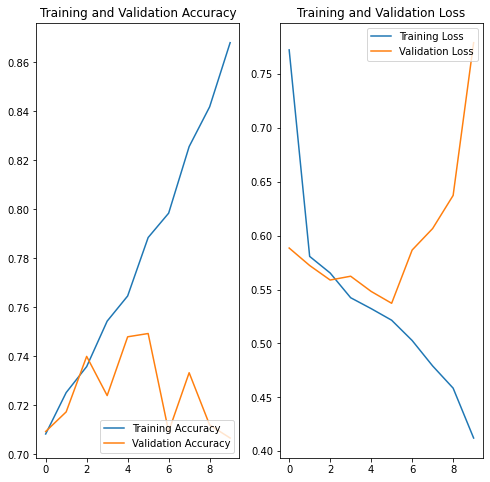

In [72]:
# Plot the training and validation accuracy/loss per epoch
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [73]:
# Evaluate the model
model.evaluate(test_melspectrogram, test_labels)

30/30 [==============================] - 1s 26ms/step - loss: 0.8461 - accuracy: 0.7103


[0.8461306691169739, 0.7103301286697388]

<AxesSubplot:>

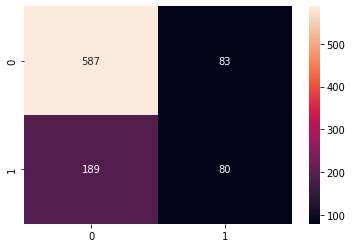

In [74]:
# Predict the labels
predictions = model.predict(test_melspectrogram)

# Confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(cm, annot=True, fmt='d')

In [75]:
# Save the model
model.save('covid_cough_model.h5')